# 이미지 인식
- 고양이 강아지 사진 구분
- CNN 이용
- 원래 데이터는 25,000개 (고양이 + 강아지)
- 여기서는 2000개로 학습을 시킨다, 검증은 1000개의 이미지 사용
- colab에서 실행 (런타임-유형변경-GPU 설정)

## 신경망 성능 개선
- 과대적합과 과소적합을 피해야 한다

##  과대적합

- 모델이 훈련 데이터에 대해서만 잘 동작하도록 만들어져서 새로운 데이터에 대해서는 오히려 잘 동작하지 못하는 경우를 과대적합(over fitting)되었다고 한다
- 머신러닝에서는 과대적합을 피해서 일반적으로 잘 동작하게 모델을 만드는 것이 매우 중요하다
- 이를 모델의 일반화(generalization)라고 한다.
- 일반화 방법
  - 모델을 단순하게 만든다  : (모델의 복잡도+epoch+데이터의 갯수)
  - 더 많은 훈련 데이터 확보한다
  - 훈련 데이터에서 잡음을 줄인다 (아웃라이어 등)

- 규제화: 일반화를 위해서 모델을 단순하게 만드는 것을 모델에 제약을 가한다고 하여 규제화(regularization)라고 한다
- 과대적합 발생여부는 성능 및 손실함수의 변화를 보고 판단한다 (훈련 및 검증 데이터에 대한 결과비교)

- 신경망은 파라미터 갯수가 많아서 과대적합할 가능성이 항상 높다. 훈련 데이터 양이 많지 않을 때에는 특히 주의해야 한다.
- 과대적합이 발생하면 신경망의 구조를 단순하게 만들어야 한다.
- 그러나 신경망 구조를 너무 단순하게 만들면 표현 능력이 줄어들어 성능이 떨어지게 된다. 과소적합이 발생하는지를 살펴보아야 한다.


<img src='https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.24.12.png?raw=1' align='left' width=400>


<img  src='https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.23.54.png?raw=1' align='left' width=400>

# 데이터

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import zipfile
import matplotlib.image as mpimg
import os, os.path, shutil

## 데이터 다운로드
- cliend URL 명령으로 데이터 다운로드

In [5]:
!curl -L \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -o ./cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.4M  100 65.4M    0     0  20.8M      0  0:00:03  0:00:03 --:--:-- 20.9M


In [6]:
# 압축 풀기
with zipfile.ZipFile("cats_and_dogs_filtered.zip", 'r') as z:
    print(z.namelist())
    z.extractall()

['cats_and_dogs_filtered/', 'cats_and_dogs_filtered/vectorize.py', 'cats_and_dogs_filtered/validation/', 'cats_and_dogs_filtered/train/', 'cats_and_dogs_filtered/validation/dogs/', 'cats_and_dogs_filtered/validation/dogs/dog.2127.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2126.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2125.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2124.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2123.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2122.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2121.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2120.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2119.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2118.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2117.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2116.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2115.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2114.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2113.

In [ ]:
!dir cat*  # 윈도우에서 폴더 확인

cats_and_dogs_filtered.zip

cats_and_dogs_filtered:
train  validation  vectorize.py


In [ ]:
# !unzip -q cats_and_dogs_filtered.zip # 리눅스 머신에서 압축풀기

- 폴더 이름 alias로 관리

In [7]:
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련 데이터 (이미지)가 있는 폴더
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 검증 데이터 (이미지)가 있는 폴더
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cats_dir

'./cats_and_dogs_filtered/train/cats'

## 이미지 확인

In [8]:
train_cat_fnames = os.listdir(train_cats_dir) #이 폴더안에 있는 파일들을 모두 list로 만들어줌. 아니면 grob 로 폴더안의 파일들을 뽑아옴.
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort() #  주의: sort() 결과는 리스트에  즉시 반영된다  #SORT는 필수는 아님.
print(train_dog_fnames[:10])

['cat.296.jpg', 'cat.481.jpg', 'cat.3.jpg', 'cat.198.jpg', 'cat.431.jpg', 'cat.30.jpg', 'cat.515.jpg', 'cat.566.jpg', 'cat.308.jpg', 'cat.982.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


- 파일(이미지) 갯수

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


## 이미지 샘플 보기

(375, 499, 3)


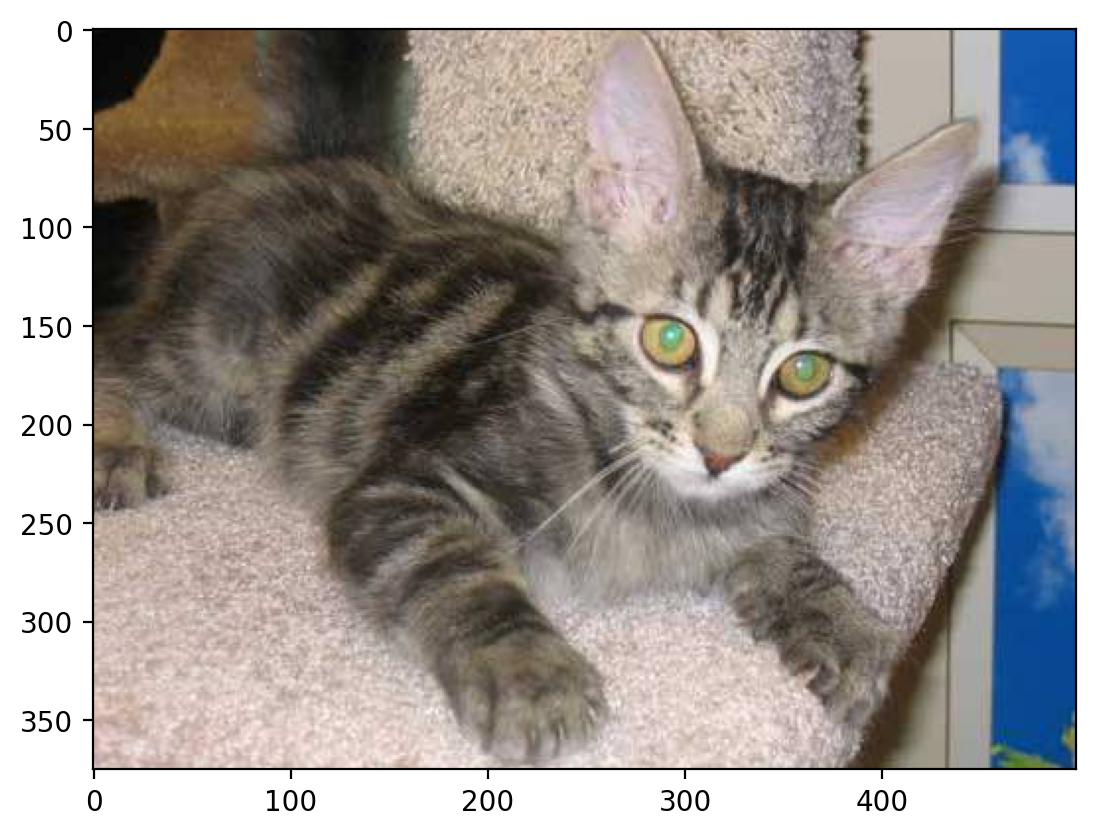

In [9]:
img_path = os.path.join(train_cats_dir, train_cat_fnames[9])
img = mpimg.imread(img_path)   #matplotlib 에서 제공하는 함수 Img를 읽어온다.
print(img.shape)     #Image Size
plt.imshow(img)      #Image를 보여준다.

# CNN 모델
- 이미지는 테이블에 담을 수 없으므로 폴더에서 이미지를 하나씩 불러와야 한다. ImageDataGenerator를 사용한다
- 참조 (https://stackoverflow.com/questions/53634924/keras-imagedatagenerator-equivalent-for-csv-files)


In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- 그림의 크기를 일정하게 바꾸어 사용한다
  - 150*150

## data augmentation과 드롭아웃

In [11]:
img_width = 150
img_height = 150

train_datagen = ImageDataGenerator(   #그림을 가져올때마다, Scale이나 각도, 가로,세로를 조금씩 바꾸겠다. flip은 뒤집기도 한다는 얘기.
  rescale= 1./255,
  rotation_range = 60,
  width_shift_range = 0.4,
  height_shift_range = 0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)   #Scale을 255로 나눔. 3원색 8bit로 해서 0~255 로 나뉘었는데..이젠 의미는 없는데 습관적으로..

train_generator = train_datagen.flow_from_directory(directory=train_dir,
											   target_size=(img_width,img_height),
 											   classes=['cats','dogs'],
											   batch_size=20)
#cat 폴더에서 랜덤하게 20장씩 뽑아오는데, 그림크기를 150X150으로 맞춰서 가져오너라. 자르는게 아니라 찌그러트려서
#왜 사이즈(리졸루션)가 하필 150X150일까. 사진 사이즈는 클수록 성능은 좋은데, 시간이 오래걸림.
#Batch Size는 성능에 크게 영향을 미치진 않는데, 학습 속도에 영향을 줌. 너무 사진이 1개당 용량이 크면.. 적은 사이즈로 학습시키고 해야함.

validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
											   target_size=(img_width,img_height),
 											   classes=['cats','dogs'],
											   batch_size=20)


model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu',
                        input_shape=(img_width, img_height, 3)))
 #왜 하필 32부터 시작하나요. 이것도 습관이에요. ㅋㅋ 첫번째 필터는 수직선, 수평선 밖에 없는데 30개 정도 필터면 어지간한건 다 포함함.
 #근데 보면 필터의 크기를 키움. 32->64->128->128 ... 왜냐면 작은 픽셀이 모여서 복잡해지면 그들을 더 잘 구분하기 위해서 필터가 많이 필요함.

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
#DROPOUT은 Feature map을 통과시키면서 Convert를 하는데, 일부러 Data를 통과시키지 않는 것. 감추는 것.
#0.5는 50%를 drop시킨다는것. 대신 dropout을 시키면 학습횟수를 늘린다. 데이터 노출횟수를 늘려주는 것.
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 모델 학습

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]

history = model.fit_generator(
    generator=train_generator,
    epochs=50,
    callbacks=callbacks_list,
    validation_data=validation_generator)

<ipython-input-12-1fd37da52d46>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
 24/100 [======>.......................] - ETA: 1:15 - loss: 0.7828 - accuracy: 0.5083

KeyboardInterrupt: ignored

- 동작 확인 함수

In [ ]:
def show_4_graphs(history):
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
    plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
    plt.plot(history.history['loss'], 'r--', label='Loss of training data')
    plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
    plt.title('Model Accuracy and Loss')
    plt.ylabel('Accuracy and Loss')
    plt.xlabel('Training Epoch')
    plt.ylim(0)
    plt.legend()
    plt.show()

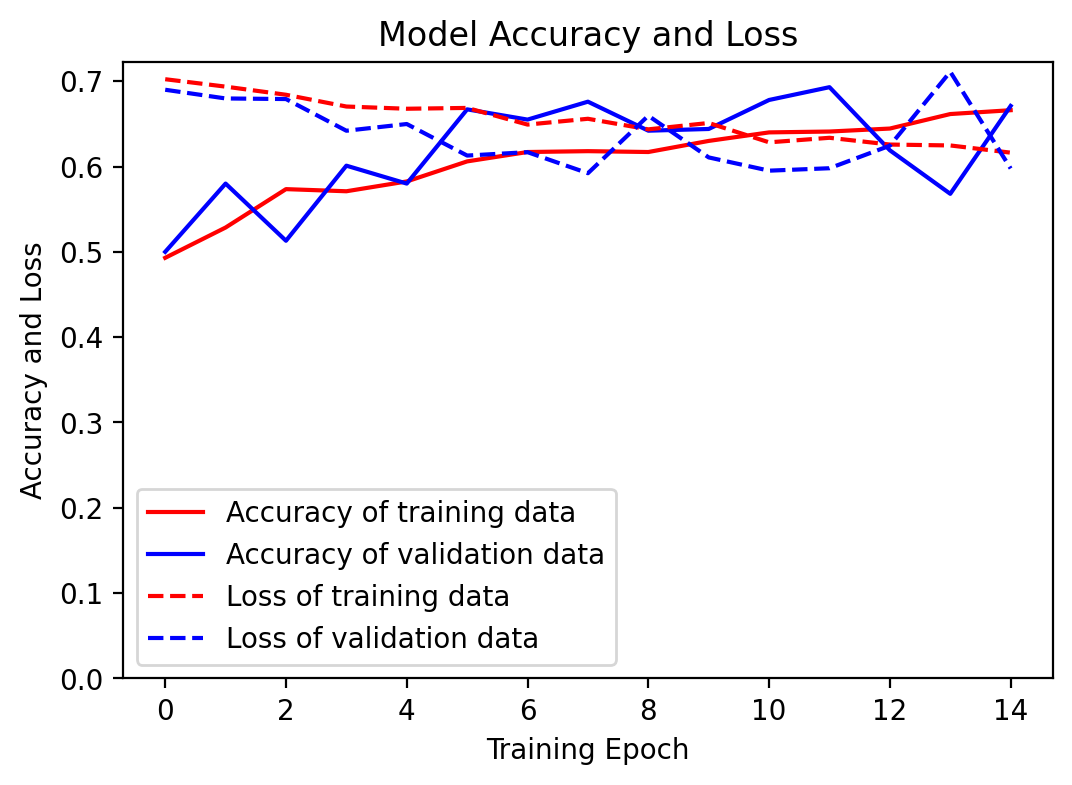

In [ ]:
show_4_graphs(history)
# 현재 성능이 최대 성능이 0.7 정도인데..이건 시원찮은 모델임. 0.9는 되야하는데.. 이 부분 성능 개선하는건 내일(09/22) 할 것임.
# 왜 성능이 떨어지냐면 모델이 너무 심플해서 그럼. Layer가 4개밖에 없음..

# 모델 적용


##  강아지 사진으로  테스트

- 모델의 출력에는 클래스 확률이 리턴된다 (고양이, 강아지)일 확률
- 신경망에서는 predict()가 클래스 확률을 리턴한다

In [ ]:
# 아래는 한번만 실행하면 된다 (이미지를 처리하기 위해서 opencv 설치)
# !pip install opencv-python

In [13]:
import cv2
# 강아지 검증 사진이 있는 폴더
folder = validation_dogs_dir

images = [] # 원본 이미지를 담는 리스트
processed_images = [] # 전처리된 이미지를 담는 리스트

# 데이터 전처리
for file in os.listdir(folder):
    image = mpimg.imread(os.path.join(folder, file))  #그 경로의 파일을 읽어서
    if image is not None:  #파일을 읽는 동안 계속해라.
        rescaled = cv2.resize(image, (150, 150))/255.0
        images.append(image)
        processed_images.append(rescaled)    #전처리된 이미지

# 리스트를 어레이로 바꾸어준다
processed_images = np.array(processed_images)

# 모델의 출력에는 클래스 확률이 리턴된다 (고양이, 강아지)일 확률
# 신경망에서는 predict()가 클래스 확률을 리턴한다
predictions = model.predict(processed_images)   #예측  predic을 호출

16/16 [==============================] - 7s 429ms/step


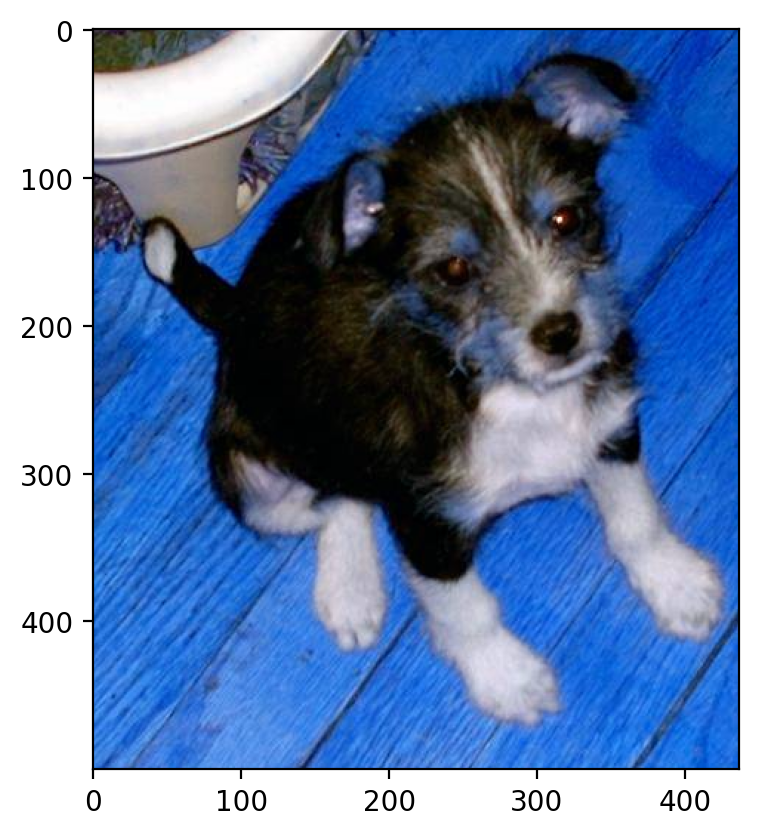

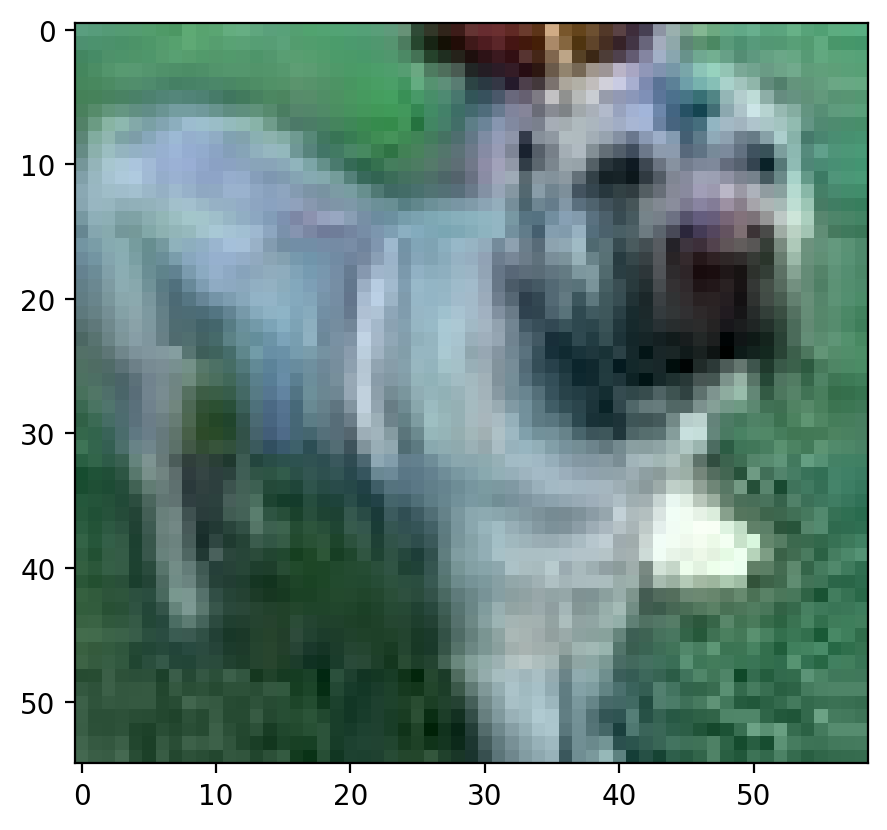

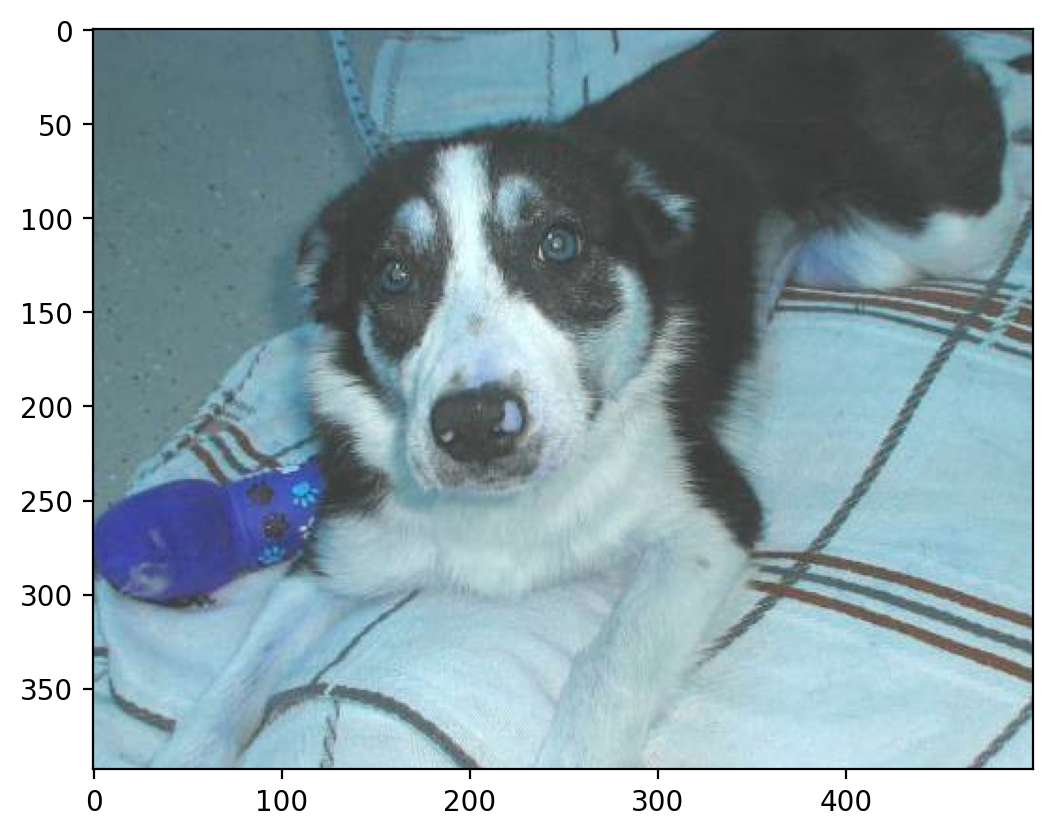

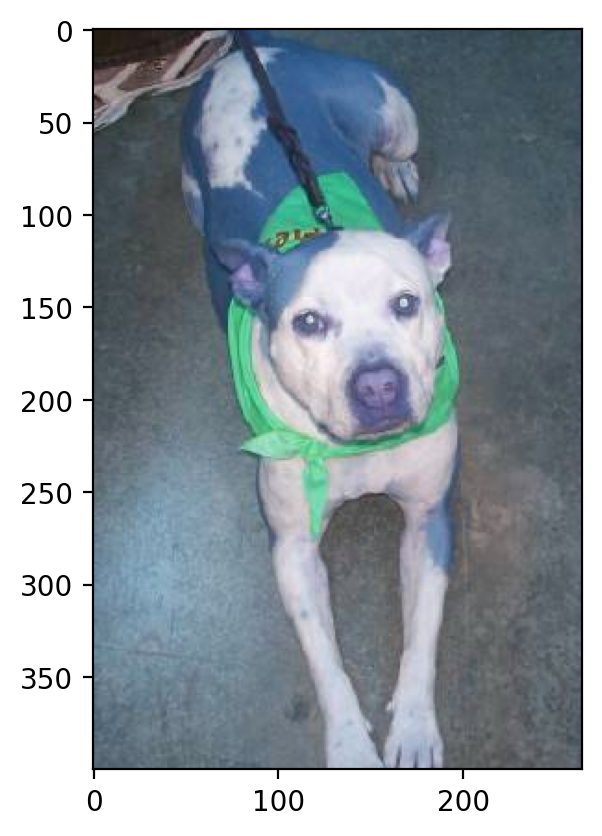

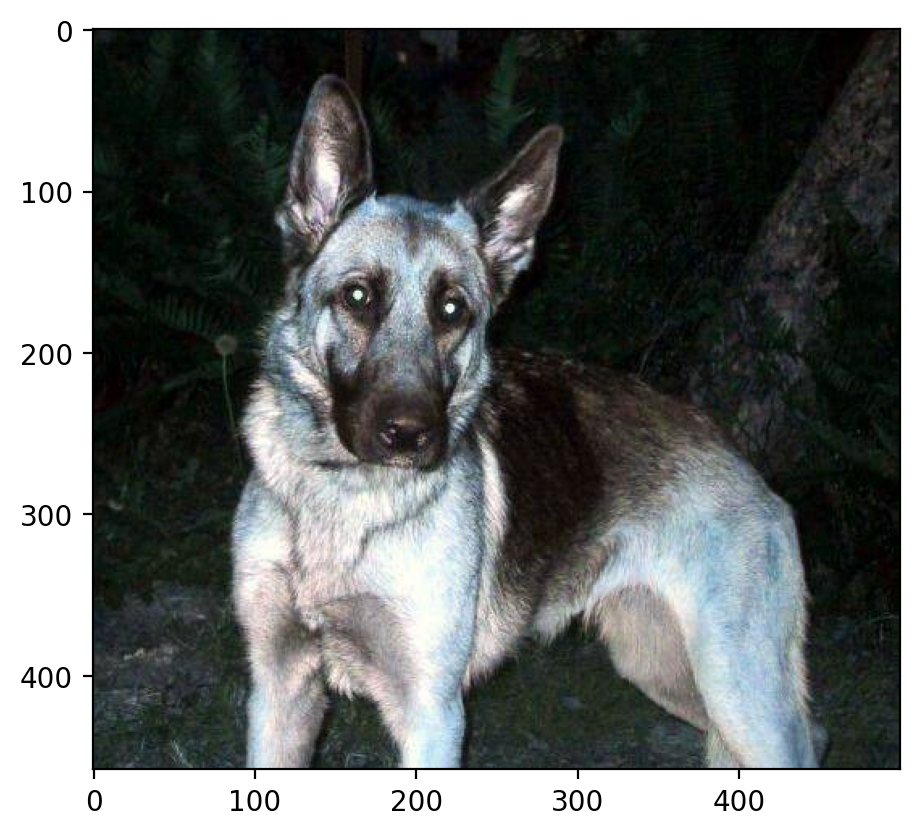

In [14]:
# 샘플 사진 보기
for index in range(5):
     plt.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
     plt.show()

In [15]:
# 강아지로 판독할 클래스 확률
predictions[:5][:,1]  #확률이 0.5 이상이면 강아지임

array([0.46784967, 0.4723525 , 0.47044477, 0.46914276, 0.4699853 ],
      dtype=float32)

In [16]:
# 판독 결과
(predictions[:5][:,1]  > 0.5)

array([False, False, False, False, False])

## 고양이 사진으로  테스트

In [17]:
# 고양이 검증 사진이 있는 폴더
folder = validation_cats_dir

images = [] # 원본 이미지를 담는 리스트
processed_images = []  # 전처리된 이미지를 담는 리스트

# 데이터 전처리
for file in os.listdir(folder):
    image = mpimg.imread(os.path.join(folder, file))
    if image is not None:
        rescaled = cv2.resize(image, (150, 150))/255.0
        images.append(image)
        processed_images.append(rescaled)

processed_images = np.array(processed_images)
# 신경망에서는 predict()가 클래스 확률을 리턴한다
predictions = model.predict(processed_images)

16/16 [==============================] - 6s 349ms/step


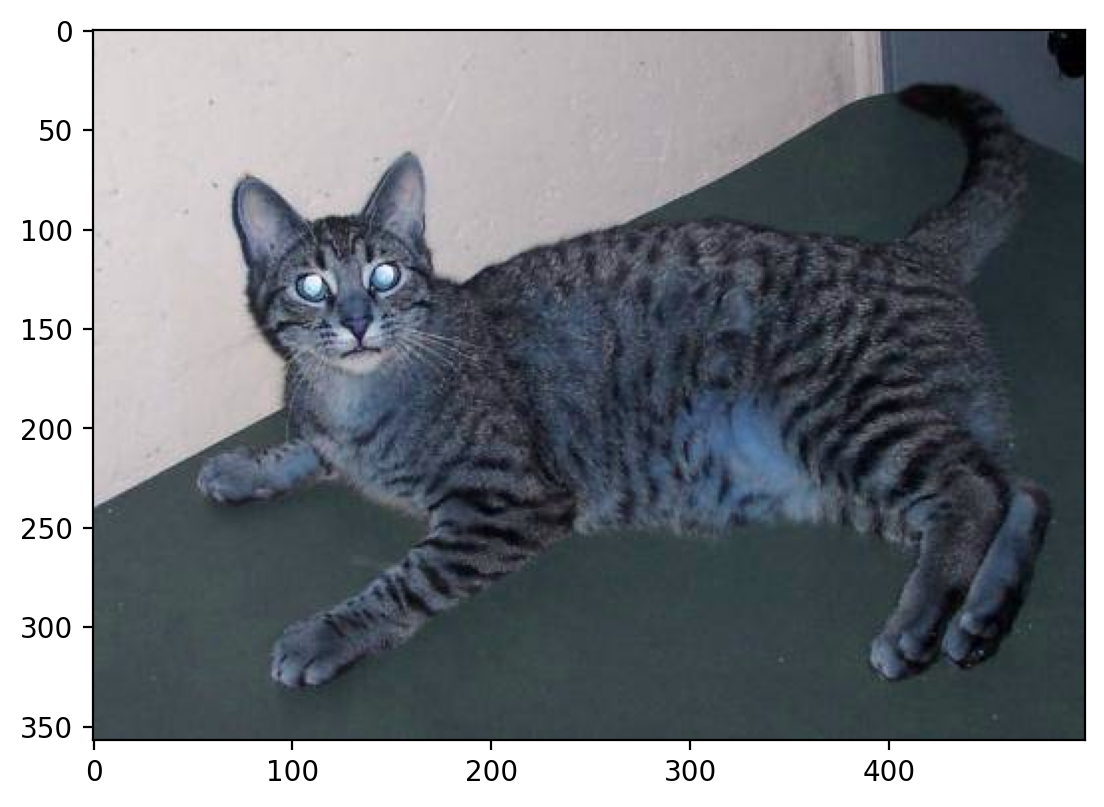

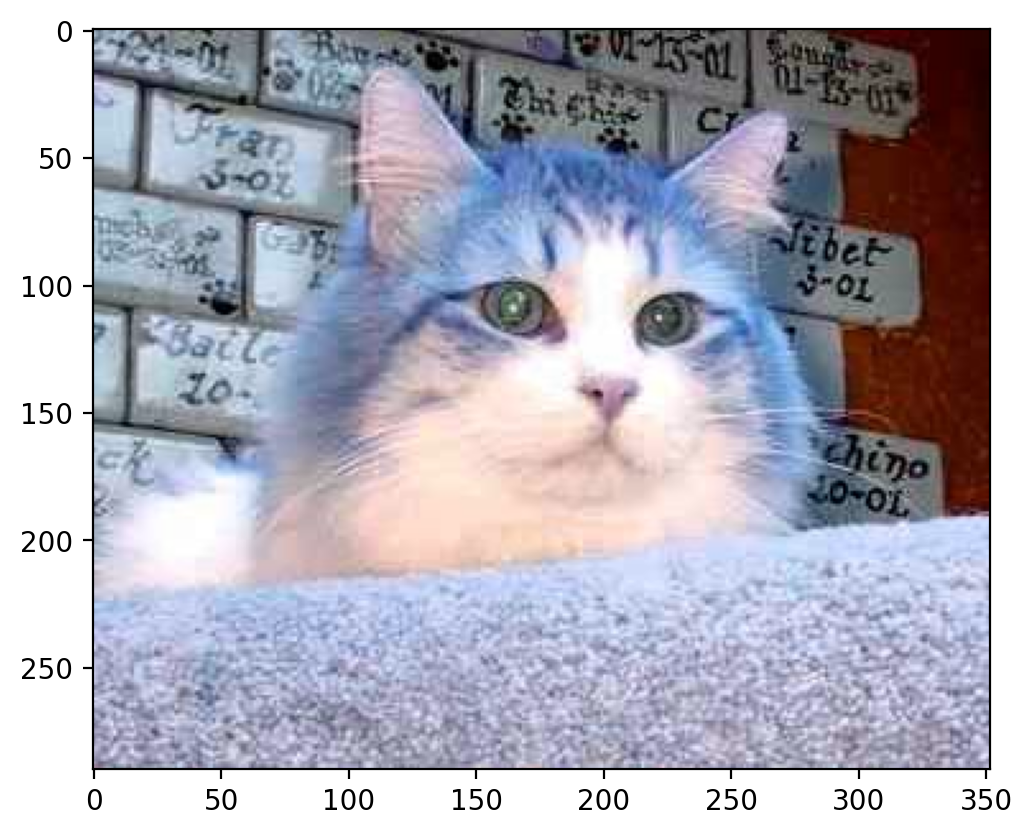

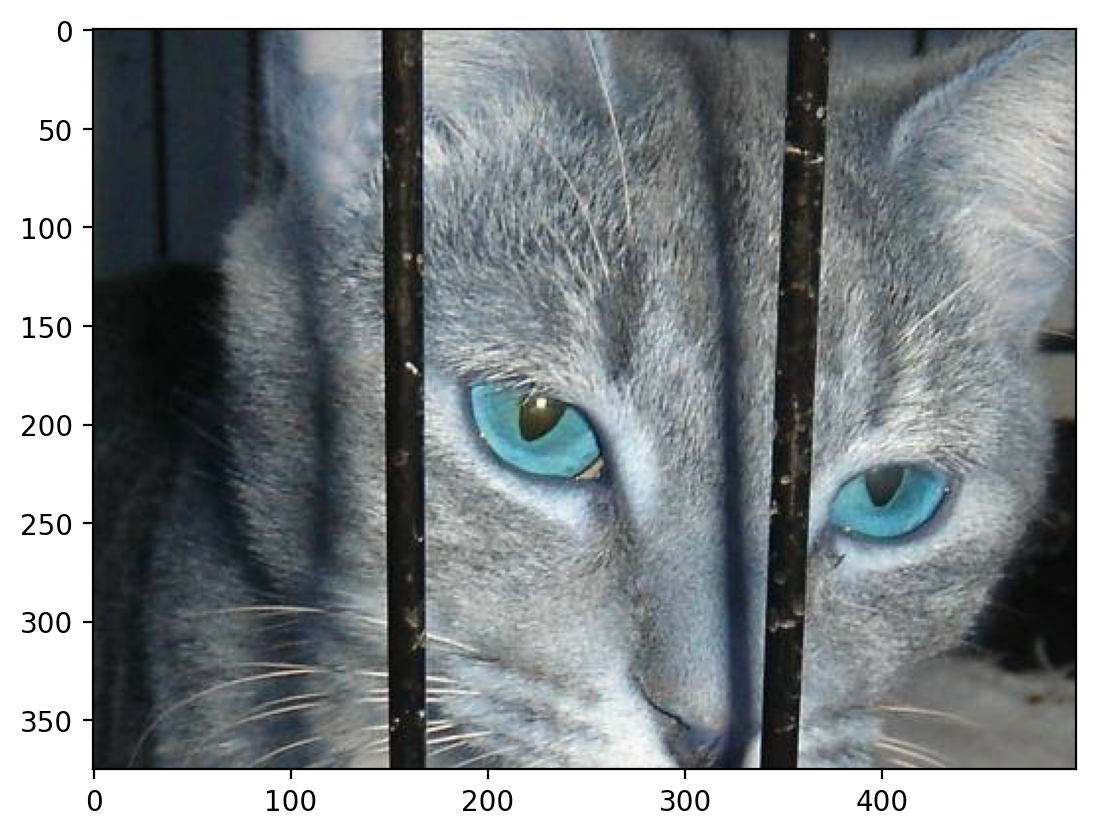

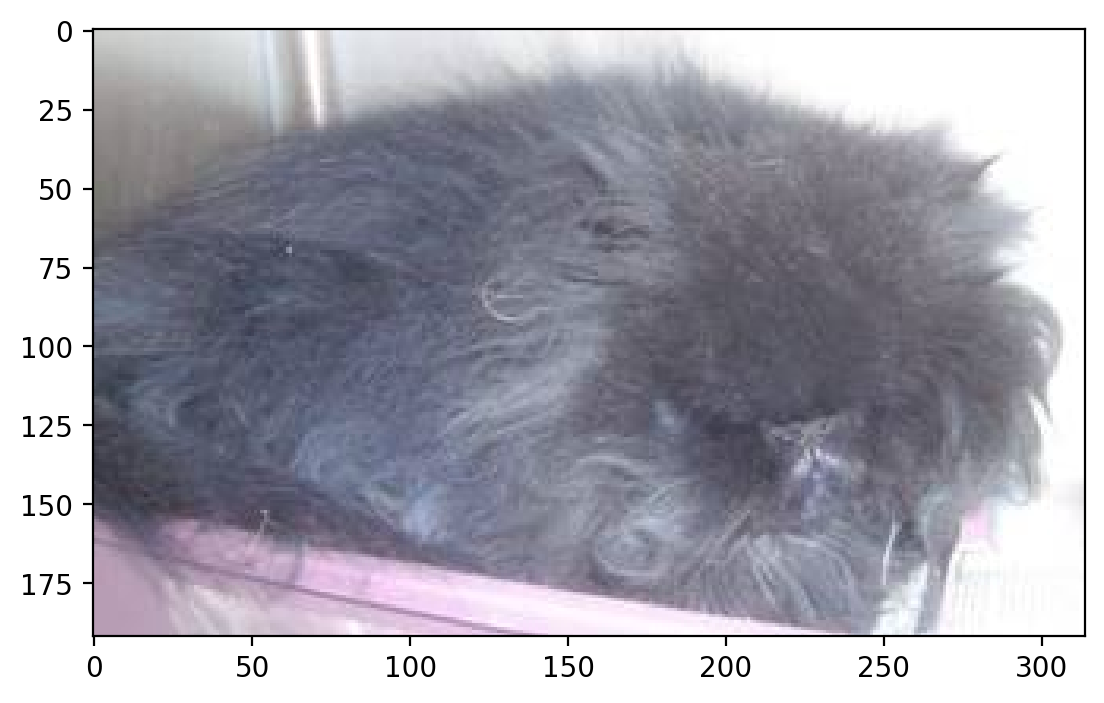

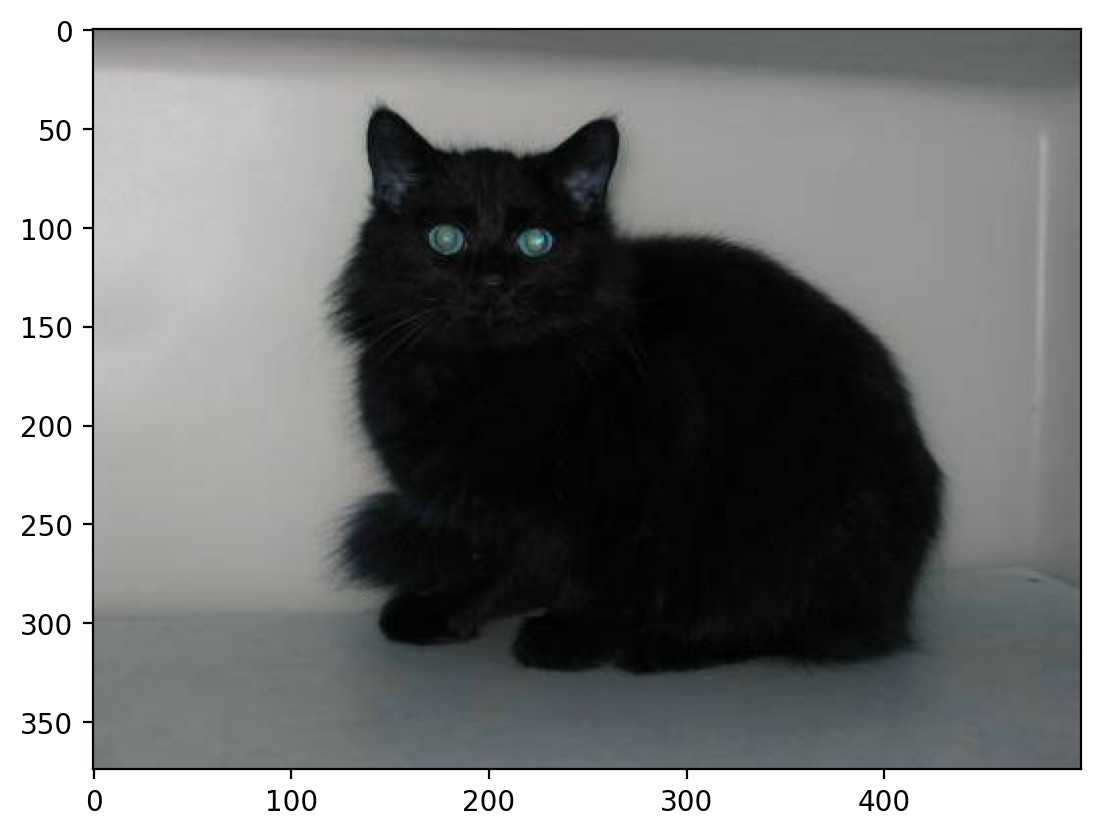

In [18]:
# 샘플 사진 보기
for index in range(5):
     plt.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
     plt.show()

In [19]:
# 고양이로 판독할 클래스 확률
predictions[:5][:,0]

array([0.52755034, 0.53382874, 0.5327246 , 0.52755356, 0.52522296],
      dtype=float32)

In [20]:
# 판독 결과
(predictions[:,0] > 0.5)[:5]

array([ True,  True,  True,  True,  True])

## 이미지를 한장씩 판독하는 방법

- 샘플이 하나라도 머신러닝 입력으로는 2차원 테이블 구조를 입력해야 한다
- 즉, 한 행(샘플)으로 구성된 2차원 어레이를 만들어야 한다
- 어레이 img의 차원을 하나 높이는 방법으로 img = img[np.newaxis, ...]를 사용한다
- 레이블은 (cat, dog)순으로 (0, 1)로 원핫인코딩되어 있다 (알파벳 순임)

In [ ]:
for i, img in enumerate(processed_images[:5]):
     img = img[np.newaxis, ...]
     prob = model.predict(img)
     if prob[:,1] > 0.5:
        print(i, "강아지")
     if prob[:,1] < 0.5:
        print(i, "고양이")

1/1 [==============================] - 0s 24ms/step
0 강아지
1/1 [==============================] - 0s 28ms/step
1 고양이
1/1 [==============================] - 0s 35ms/step
2 강아지
1/1 [==============================] - 0s 43ms/step
3 고양이
1/1 [==============================] - 0s 34ms/step
4 고양이
